##### Create folder named 'ComputerVision' in Google drive and set context to this location

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Create a finder named 'ComputerVision' in your root path of Google drive
import os
os.chdir('/content/gdrive/My Drive/ComputerVision')
%pwd

Mounted at /content/gdrive


'/content/gdrive/My Drive/ComputerVision'

##### Create prompt Config file for fine tuning

In [ ]:
import json

def get_subfolders(directory):
    sub_dic = {}
    for root, dirs, files in os.walk(directory):
        for folder in dirs:
            subfolder_path = os.path.join(root, folder)
            # print("Subfolder:", subfolder_path)
            sub_dic[folder] = subfolder_path
    return sub_dic

train_data_path = 'experiment1'
dics = get_subfolders(train_data_path)
prompts = []
for key, value in dics.items():
    prompts.append({
        "instance_prompt":      "head photo of " + key,
        "class_prompt":         "head photo of human being with light blue eyes",
        "instance_data_dir":    './'+ value,
        "class_data_dir":       "./class-images/" + 'blue_eyes'
    })

    prompts.append({
        "instance_prompt":      "head photo of " + key,
        "class_prompt":         "head photo of human being wearing transparent glasses",
        "instance_data_dir":    './'+ value,
        "class_data_dir":       "./class-images/" + 'transparentglasses'
    })

    prompts.append({
        "instance_prompt":      "head photo of " + key,
        "class_prompt":         "head photo of human being wearing a scarf",
        "instance_data_dir":    './'+ value,
        "class_data_dir":       "./class-images/" + 'scarf'
    })

    prompts.append({
        "instance_prompt":      "head photo of " + key,
        "class_prompt":         "head photo of human being wearing a mask",
        "instance_data_dir":    './'+ value,
        "class_data_dir":       "./class-images/" + 'mask'
    })
    prompts.append({
      "instance_prompt":      "head photo of " + key,
      "class_prompt":         "head photo of human being with a sketch style",
      "instance_data_dir":    './'+ value,
      "class_data_dir":       "./class-images/" + 'sketch'
    })

concept_file = 'concepts_list.json'
%rm $concept_file

# Convert the list to JSON
json_data = json.dumps(prompts)

# Write the JSON data to a file
with open(concept_file, 'w') as json_file:
    json_file.write(json_data)

In [ ]:
json_data

'[{"instance_prompt": "head photo of Mark Wang", "class_prompt": "head photo of human being with light blue eyes", "instance_data_dir": "./experiment1/Mark Wang", "class_data_dir": "./class-images/blue_eyes"}, {"instance_prompt": "head photo of Mark Wang", "class_prompt": "head photo of human being wearing transparent glasses", "instance_data_dir": "./experiment1/Mark Wang", "class_data_dir": "./class-images/transparentglasses"}, {"instance_prompt": "head photo of Mark Wang", "class_prompt": "head photo of human being wearing a scarf", "instance_data_dir": "./experiment1/Mark Wang", "class_data_dir": "./class-images/scarf"}, {"instance_prompt": "head photo of Mark Wang", "class_prompt": "head photo of human being wearing a mask", "instance_data_dir": "./experiment1/Mark Wang", "class_data_dir": "./class-images/mask"}, {"instance_prompt": "head photo of Mark Wang", "class_prompt": "head photo of human being with a sketch style", "instance_data_dir": "./experiment1/Mark Wang", "class_dat

In [ ]:
# Install diffusers
!pip install git+https://github.com/ShivamShrirao/diffusers.git

  Cloning https://github.com/ShivamShrirao/diffusers.git to /tmp/pip-req-build-c6nizixj
  Running command git clone --filter=blob:none --quiet https://github.com/ShivamShrirao/diffusers.git /tmp/pip-req-build-c6nizixj
  Resolved https://github.com/ShivamShrirao/diffusers.git to commit 2c298300756fa7d8bf644852cffaebc5072f11f6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Install required dependencies
!pip install -r requirements.txt

In [ ]:
!pip install bitsandbytes

In [ ]:
!pip install xformers

In [ ]:
# # Create a hugging face account
# !pip install huggingface_hub

# from huggingface_hub import notebook_login
# notebook_login()

##### Before training, clear the memory of GPU

In [ ]:
!pip install numba

from numba import cuda
device = cuda.get_current_device()
device.reset()

In [ ]:
# --instance_data_dir="./celebrities/train/Ali Landry" \
#  --instance_data_dir="./myown/Zankar" \
# --instance_data_dir="./celebrities/train/Ali Landry" \
# --class_data_dir="./class-images/" \
# --instance_prompt="head photo of Ali Landry" \
# --class_prompt="head photo of a human being with cat nose" \
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --pretrained_vae_name_or_path="stabilityai/sd-vae-ft-mse" \
  --output_dir="./output-models/" \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --resolution=256 \
  --train_batch_size=1 \
  --train_text_encoder \
  --mixed_precision="fp16" \
  --use_8bit_adam \
  --gradient_accumulation_steps=1 \
  --gradient_checkpointing \
  --learning_rate=1e-6 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=200 \
  --num_class_images=300 \
  --max_train_steps=1500 \
  --save_interval=500 \
  --concepts_list="./concepts_list.json"

Steps:  39% 580/1500 [05:27<08:51,  1.73it/s, loss=0.218, lr=1e-6]07/15/2023 19:44:41 - INFO - accelerate.tracking - Successfully logged to TensorBoard
Steps:  39% 590/1500 [05:32<08:25,  1.80it/s, loss=0.216, lr=1e-6]07/15/2023 19:44:47 - INFO - accelerate.tracking - Successfully logged to TensorBoard
Steps:  40% 600/1500 [05:38<08:21,  1.80it/s, loss=0.216, lr=1e-6]07/15/2023 19:44:52 - INFO - accelerate.tracking - Successfully logged to TensorBoard
Steps:  41% 610/1500 [05:44<08:02,  1.84it/s, loss=0.216, lr=1e-6]07/15/2023 19:44:58 - INFO - accelerate.tracking - Successfully logged to TensorBoard
Steps:  41% 620/1500 [05:49<07:33,  1.94it/s, loss=0.215, lr=1e-6]07/15/2023 19:45:03 - INFO - accelerate.tracking - Successfully logged to TensorBoard
Steps:  42% 630/1500 [05:54<07:29,  1.94it/s, loss=0.215, lr=1e-6]07/15/2023 19:45:08 - INFO - accelerate.tracking - Successfully logged to TensorBoard
Steps:  43% 640/1500 [05:59<07:20,  1.95it/s, loss=0.214, lr=1e-6]07/15/2023 19:45:13 - 

In [ ]:
from diffusers import StableDiffusionPipeline, DDIMScheduler
import torch

device = "cuda"
# use DDIM scheduler, you can modify it to use other scheduler
scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False, set_alpha_to_one=True)

# modify the model path
pipe = StableDiffusionPipeline.from_pretrained(
    f"./output-models/1500/",
    scheduler=scheduler,
    safety_checker=None,
    torch_dtype=torch.float16,
).to(device)

# enable xformers memory attention
pipe.enable_xformers_memory_efficient_attention()

In [ ]:
prompt = "Photo of Mark Wang with light blue eyes "
negative_prompt = ""
num_samples = 10
guidance_scale = 3
num_inference_steps = 100
height = 256
width = 256

images = pipe(
    prompt,
    height=height,
    width=width,
    negative_prompt=negative_prompt,
    num_images_per_prompt=num_samples,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale
).images

# count = 1
# for image in images:
#     # save image to local directory
#     image.save(f"img-{count}.png")
#     count += 1

In [ ]:
# from diffusers import StableDiffusionDepth2ImgPipeline
from matplotlib import pyplot as plt

def plot_multiple_images(row, nums_in_row, images, figsize=(10, 4)):
    # Create a figure and subplots with a row of images
    fig, axs = plt.subplots(row, nums_in_row, figsize=figsize)
    # Adjust spacing between subplots
    fig.subplots_adjust(hspace=0, wspace=0)
    if axs.ndim == 1: axs = axs.reshape((1,-1))
    capabilities = row * nums_in_row
    min_one = min(capabilities, len(images))
    for i in range(min_one):
        image = images[i]
        row = i // nums_in_row
        column = i % nums_in_row
        axs[row][column].imshow(image)
        axs[row][column].axis('off')

    # Adjust the spacing between subplots
    # plt.tight_layout()
    plt.show()

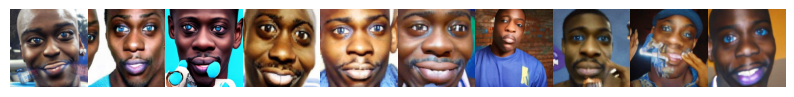

In [ ]:
plot_multiple_images(1, num_samples, images)

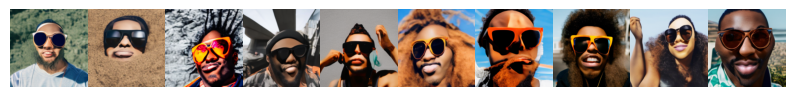

In [ ]:
plot_multiple_images(1, num_samples, images)

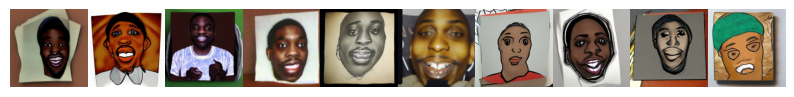

In [ ]:
plot_multiple_images(1, num_samples, images)

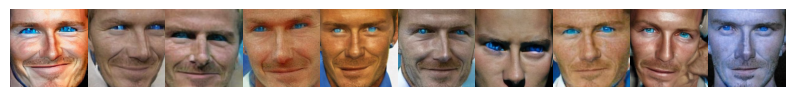

In [ ]:
plot_multiple_images(1, num_samples, images)